# Download some chl data and plot

In [1]:
import requests

url="https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdMGchlamday.csv?chlorophyll%5B(2009-04-16):1:(2011-04-16)%5D%5B(0.0):1:(0.0)%5D%5B(28.0):4:(30.8125)%5D%5B(-91.05):4:(-84.5)%5D"
response = requests.get(url)

Save to a file. It's like 8 megabytes

In [2]:
with open('chl.csv', 'w') as f:
  f.write(response.text)

# Read in the table and get the mean chl over all locations

In [14]:
import pandas as pd

# Read the table from the csv file; skip the header row with the data info
# need to put skiprows in [] to say skip the 2nd (index=1) row not rows 0 and 1
df = pd.read_csv('chl.csv', parse_dates=['time'], low_memory=False, skiprows=[1])

In [16]:
# Create a new table with the mean chl for each location by date
mean_chl = df.groupby(['time'])['chlorophyll'].mean()

# Reset the index to make the date and location columns appear as separate columns
mean_chl = mean_chl.reset_index()


# Now plot our data

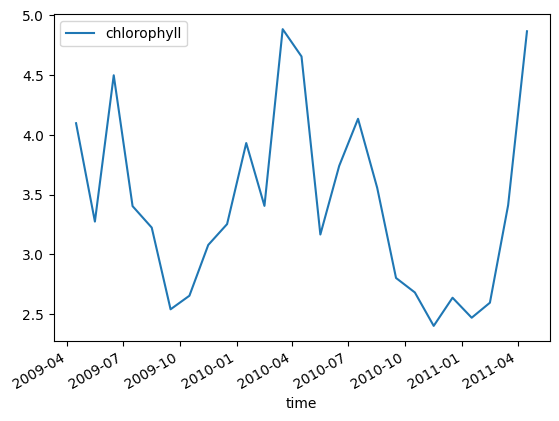

In [17]:
import matplotlib.pyplot as plt

# Plot mean chl by date
mean_chl.plot(x='time', y='chlorophyll')
plt.show()